<center> Lab2:Linear Regression<center>

Theoretical Overview

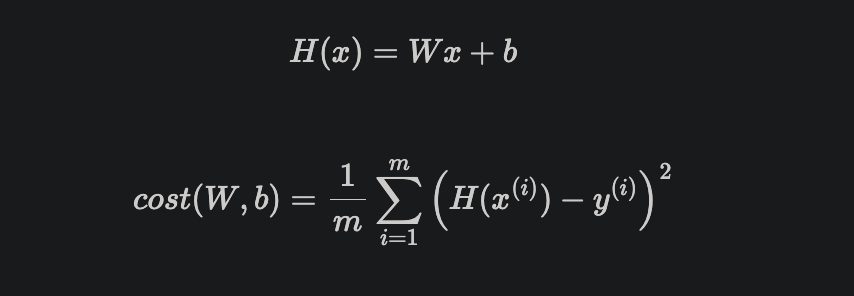

In [11]:
from IPython.display import Image
Image(filename="../images/linear_regression.png")

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim

# for reproducibility
torch.manual_seed(1)

In [25]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

print(x_train)
print(x_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


In [26]:
print(y_train)
print(y_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


#### Weight Initialization

In [27]:
W = torch.zeros(1, requires_grad=True)
print(W)

tensor([0.], requires_grad=True)


In [28]:
b = torch.zeros(1, requires_grad=True)
print(b)

tensor([0.], requires_grad=True)


#### hypothesis

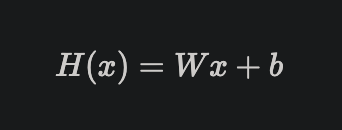

In [29]:
Image(filename="../images/hypothesis.png")

In [30]:
hypothesis = x_train * W + b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


#### cost

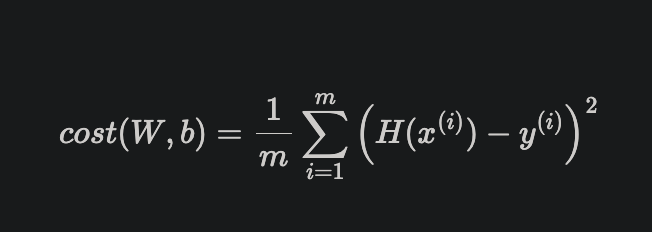

In [31]:
Image(filename="../images/cost.png")

In [32]:
print(hypothesis - y_train)

tensor([[-1.],
        [-2.],
        [-3.]], grad_fn=<SubBackward0>)


In [33]:
print((hypothesis - y_train) ** 2)

tensor([[1.],
        [4.],
        [9.]], grad_fn=<PowBackward0>)


In [34]:
cost = torch.mean((hypothesis - y_train) ** 2)

In [35]:
print(cost)

tensor(4.6667, grad_fn=<MeanBackward0>)


#### Grad Descent

In [36]:
optimizer = optim.SGD([W, b], lr=0.01)

In [37]:
optimizer.zero_grad()
cost.backward()
optimizer.step()

In [38]:
print(W)
print(b)

tensor([0.0933], requires_grad=True)
tensor([0.0400], requires_grad=True)


In [39]:
hypothesis = x_train * W + b
print(hypothesis)

tensor([[0.1333],
        [0.2267],
        [0.3200]], grad_fn=<AddBackward0>)


In [40]:
cost = torch.mean((hypothesis - y_train) ** 2)
print(cost)

tensor(3.6927, grad_fn=<MeanBackward0>)


#### Training with full code
In reality,we will be training on the dataset of multiple epochs. This can be done simply with loops

In [42]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer
optimizer = optim.SGD([W, b], lr=0.01)
nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    hypothesis = x_train * W + b
    cost = torch.mean((hypothesis - y_train) ** 2)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print("Epoch {:4d}/{} W: {:.3f} b: {:.3f} Cost: {:.6f}".format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

Epoch    0/1000 W: 0.093 b: 0.040 Cost: 4.666667
Epoch  100/1000 W: 0.873 b: 0.289 Cost: 0.012043
Epoch  200/1000 W: 0.900 b: 0.227 Cost: 0.007442
Epoch  300/1000 W: 0.921 b: 0.179 Cost: 0.004598
Epoch  400/1000 W: 0.938 b: 0.140 Cost: 0.002842
Epoch  500/1000 W: 0.951 b: 0.110 Cost: 0.001756
Epoch  600/1000 W: 0.962 b: 0.087 Cost: 0.001085
Epoch  700/1000 W: 0.970 b: 0.068 Cost: 0.000670
Epoch  800/1000 W: 0.976 b: 0.054 Cost: 0.000414
Epoch  900/1000 W: 0.981 b: 0.042 Cost: 0.000256
Epoch 1000/1000 W: 0.985 b: 0.033 Cost: 0.000158


#### High-level Implementation with nn.Module

In [43]:
# remember that we had this fake data 
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)
    def forward(self, x):
        return self.linear(x)
    
model = LinearRegressionModel()

In [44]:
hypothesis = model(x_train)


In [45]:
print(hypothesis)

tensor([[0.0739],
        [0.5891],
        [1.1044]], grad_fn=<AddmmBackward0>)


In [46]:
cost = F.mse_loss(hypothesis, y_train)
print(cost)

tensor(2.1471, grad_fn=<MseLossBackward0>)


In [53]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [56]:
#### Training with Full Code
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

model = LinearRegressionModel()
# optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)
nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    prediction = model(x_train)
    cost = F.mse_loss(prediction, y_train)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    if epoch % 100 == 0:
        params = list(model.parameters())
        W = params[0].item()
        b = params[1].item()
        print("Epoch {:4d}/{} W: {:.3f} b: {:.3f} Cost: {:.6f}".format(
            epoch, nb_epochs, W, b, cost.item()
        ))